In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data.metrics import get_metrics

In [ ]:
df = pd.read_json("../reports/discretization_grid.jsonl", lines=True)
get_metrics(df)

In [7]:
hparams = [
    'loc_levels',
    'grow_factor',
    'discretization_rows',
]
metrics = [
    "macro_precision",
    "macro_recall",
    "macro_f1",
    "top_5_accuracy",
    "top_1_accuracy",
]

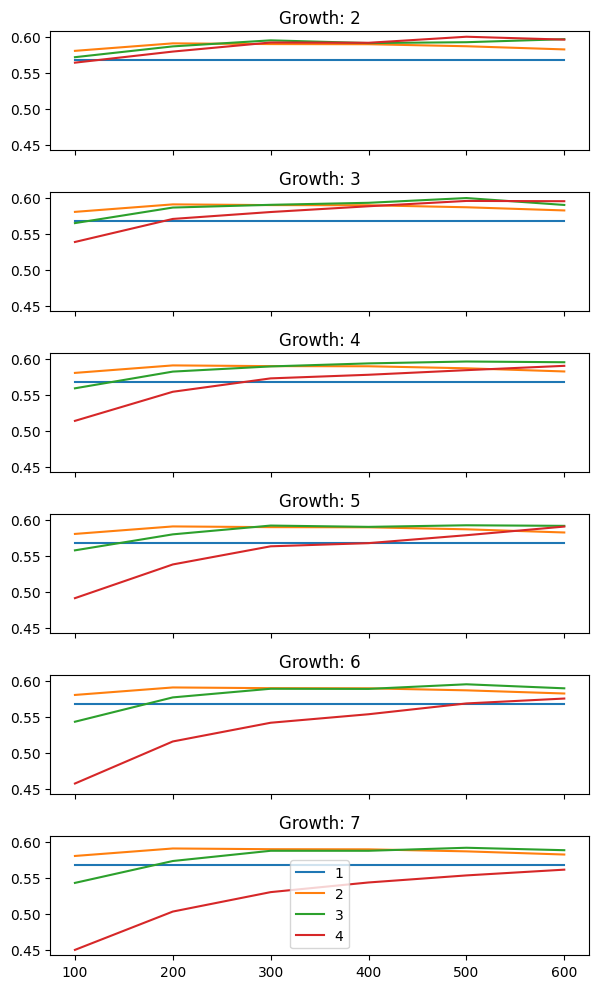

In [9]:
fig, axs = plt.subplots(nrows=6, figsize=(6, 10), sharex=True, sharey=True)
dfg = df[df['aggregation_mode'] == 'grow']
for idx, (grow_factor, dff) in enumerate(dfg.groupby('grow_factor')):
    ax = axs[idx]
    for loc_levels, dfl in dff.groupby("loc_levels"):
        dfl = dfl.sort_values(by='discretization_rows')
        ax.plot(dfl['discretization_rows'], dfl['top_1_accuracy'], label=loc_levels)
    ax.set_title(f"Growth: {grow_factor}")
leg = ax.legend()        
fig.tight_layout()
    

In [16]:
dfg = df[df['aggregation_mode'] == 'grow']
dft = dfg [dfg['grow_factor'] == 2]
max_idcs = dft.groupby("loc_levels")['top_1_accuracy'].idxmax()
dft.loc[max_idcs][hparams + metrics]

,loc_levels,grow_factor,discretization_rows,macro_precision,macro_recall,macro_f1,top_5_accuracy,top_1_accuracy
16,1,2,100,0.556094,0.518056,0.511645,0.6856,0.5680
36,2,2,200,0.558304,0.526982,0.523568,0.7138,0.5906
156,3,2,600,0.566967,0.533634,0.529528,0.7154,0.5964
160,4,2,500,0.578438,0.542850,0.539818,0.7218,0.5998


In [17]:
dft = df[df['aggregation_mode'] == 'group']
max_idcs = dft.groupby("loc_levels")['top_1_accuracy'].idxmax()
dft.loc[max_idcs][hparams + metrics]

,loc_levels,grow_factor,discretization_rows,macro_precision,macro_recall,macro_f1,top_5_accuracy,top_1_accuracy
0,1,2,100,0.556094,0.518056,0.511645,0.6856,0.5680
5,2,2,200,0.558304,0.526982,0.523568,0.7138,0.5906
84,3,2,500,0.577141,0.539004,0.536168,0.7154,0.5980
86,4,2,500,0.576041,0.537089,0.535559,0.7264,0.5938


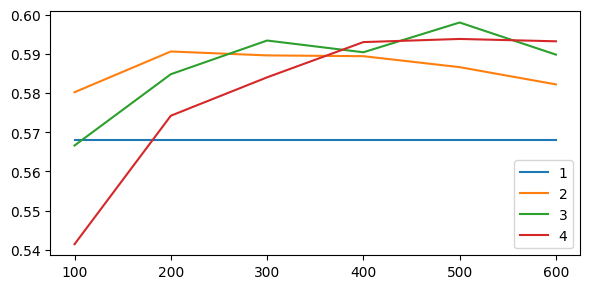

In [12]:
fig, ax = plt.subplots(nrows=1, figsize=(6, 3), sharex=True, sharey=True)
dfg = df[df['aggregation_mode'] == 'group']

for loc_levels, dfl in dfg.groupby("loc_levels"):
    ax.plot(dfl['discretization_rows'], dfl['top_1_accuracy'], label=loc_levels)
leg = ax.legend()        
fig.tight_layout()